# Monte Carlo Simulation

In order to find the theoretical limit of predicting the outcome of hockey games, we'll look at a season and observe the standard deviation/variance of win percentages for each teams over that season. We'll then simulate a season being played, varying the amount of skill and luck, in order to see how much luck and how much skill results in a similar distribution of win percentages. 

To vary the amount of skill and luck, we can use a random number generator. Let's say we want 30% luck and 70% skill, then we will generate a random double between 0 and 1. If that number is less than 0.3, then we can generate another random number to act as a coin toss for who the winner of the game is. Otherwise, we use whichever team has been assigned a higher skill. This simulation assumes that team's skills stay constant throughout the season; although it's a simplification, it shouldn't dramatically change the results and will allow for a semi-close approximation. This approach is similar to that being used in other sports (eg: football, baseball, etc.)

### Part 1: Import Necessary Libraries

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math

### Part 2: Import the Observed Season Data

In [2]:
# Read in the actual season data from winpct_season.csv

actual_season = []
with open("winpct_season.csv") as f:
    lines = f.readlines()
    lines = [x.rstrip() for x in lines]
    for i in range(0, len(lines)):
        datapt = lines[i].split(",")
        actual_season.append(int(datapt[0]) * 1. / int(datapt[1]))

actual_season = np.asarray(actual_season)
print("Observed SD in hockey season", np.std(actual_season))

Observed SD in hockey season 0.118211166442


### Part 3: Plot the observed distribution

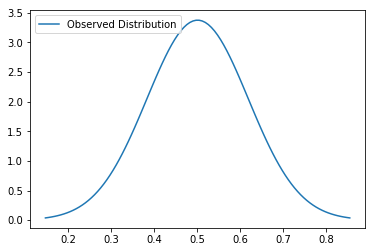

In [3]:
# Utility functions for plotting the distributions

# Plot 1 distribution (given numpy array)
def create_plot(dist):
    mu = np.mean(dist)
    sigma = np.std(dist)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x,mlab.normpdf(x, mu, sigma), label='Observed Distribution')
    plt.legend(loc='upper left')
    plt.show()

# Plot 1 distribution compared to another in red
# First distribution given mu, sigma
# Second distribution given actual data
def create_plot_compare(mu, sigma, dist, label):
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x,mlab.normpdf(x, mu, sigma), label=label)
    mu = np.mean(dist)
    sigma = np.std(dist)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x,mlab.normpdf(x, mu, sigma), c='r', label='Observed Distribution')
    plt.legend(loc='upper left')
    plt.show()

create_plot(actual_season)

### Part 4: Run Preliminary Monte Carlo Simulations

Simulate what a season would look like it if was entirely based on skill or based entirely on luck and compare it to the observed. We see that it is closer to "all luck" but still somewhere in between "all skill" and "all luck".

All skill SD 0.298142397


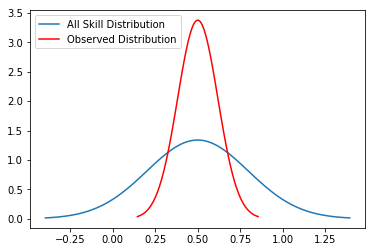

In [4]:
# See what the season might look like if it was all based entirely on skill

K = 1000 # num iterations of Monte Carlo simulation
std = 0
for _ in range(K):
    wins = np.zeros(actual_season.shape[0])
    totals = np.zeros(actual_season.shape[0])
    for i in range(actual_season.shape[0]):
        for j in range(i+1, actual_season.shape[0]):
            wins[i] += 1
            totals[i] += 1
            totals[j] += 1
    pcts = wins/totals
    std += np.std(pcts)
print("All skill SD", std*1./K)

create_plot_compare(0.5, std*1./K, actual_season, 'All Skill Distribution')

All luck SD 0.0905319437152


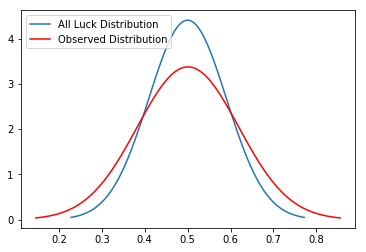

In [5]:
# See what the season might look like if it was all based entirely on luck

K = 1000 # num iterations of Monte Carlo simulation
std = 0
for _ in range(K):
    wins = np.zeros(actual_season.shape[0])
    totals = np.zeros(actual_season.shape[0])
    for i in range(actual_season.shape[0]):
        for j in range(i+1, actual_season.shape[0]):
            if random.random() < 0.5:
                wins[i] += 1
            else:
                wins[j] += 1
            totals[i] += 1
            totals[j] += 1
    pcts = wins/totals
    std += np.std(pcts)
print("All luck SD", std*1./K)

create_plot_compare(0.5, std*1./K, actual_season, 'All Luck Distribution')

### Part 5: Fine-tuned Monte Carlo Simulations

Run more fine-tuned monte carlo simulations, varying the amount of luck and the amount of skill by small amounts, until we find the distribution that matches the observed most closely.

0% luck SD 0.298142397


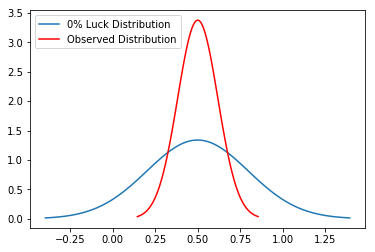

1% luck SD 0.295331449306


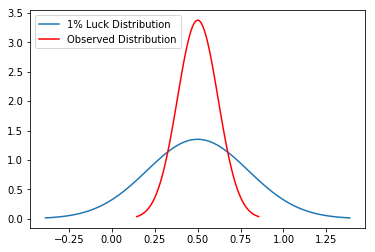

2% luck SD 0.292752125302


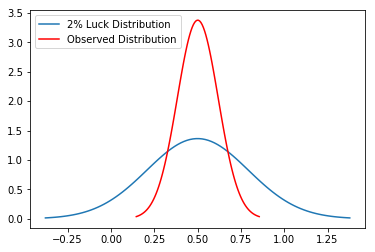

3% luck SD 0.29022106866


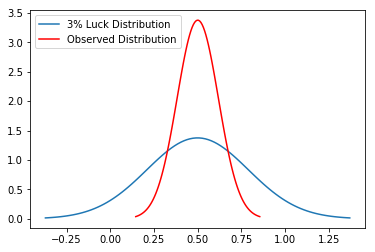

4% luck SD 0.287193007363


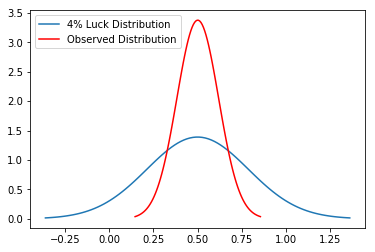

5% luck SD 0.284688429816


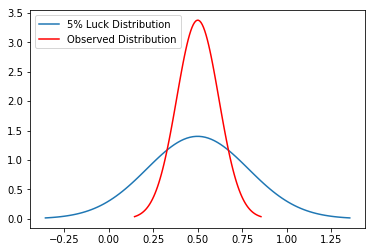

6% luck SD 0.281742452234


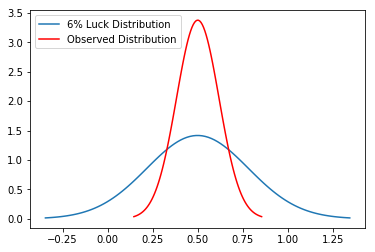

7% luck SD 0.279311088124


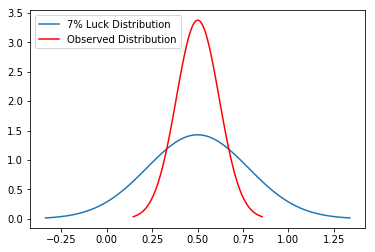

8% luck SD 0.276530564629


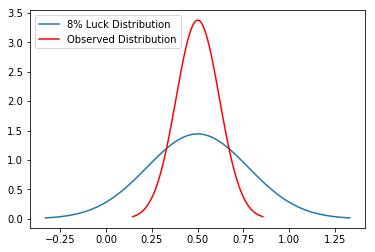

9% luck SD 0.273782392859


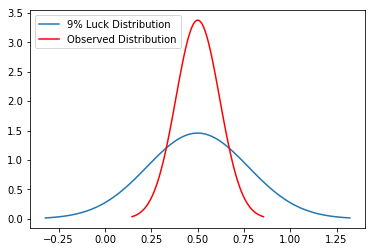

10% luck SD 0.27097419549


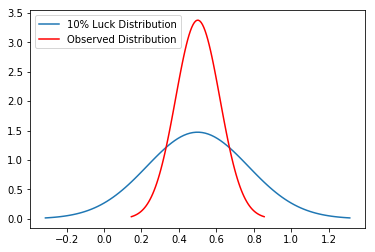

11% luck SD 0.26848634999


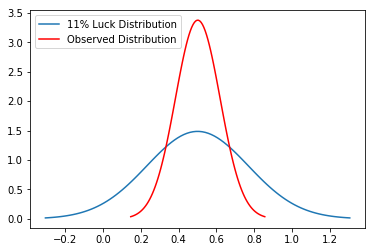

12% luck SD 0.265574193668


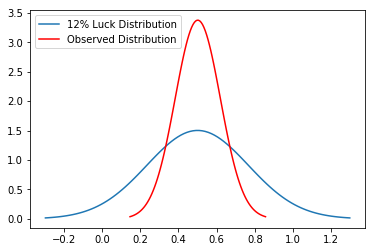

13% luck SD 0.263647132682


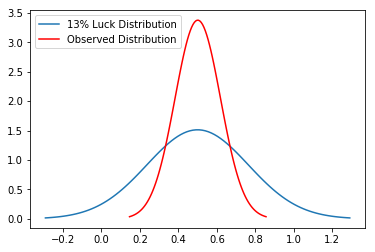

14% luck SD 0.260799204576


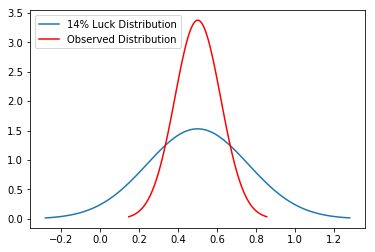

15% luck SD 0.257903353974


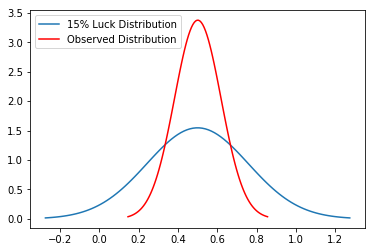

16% luck SD 0.254789742195


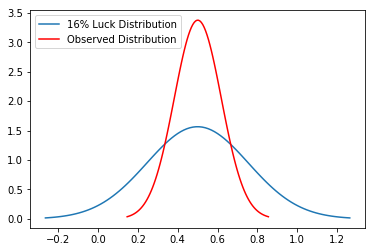

17% luck SD 0.252433625428


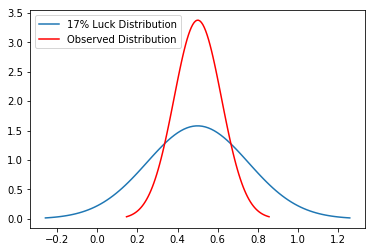

18% luck SD 0.249957639164


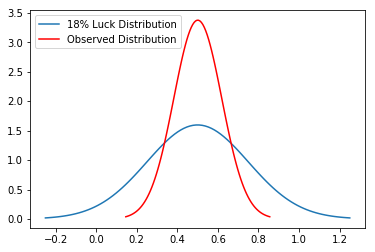

19% luck SD 0.247528065981


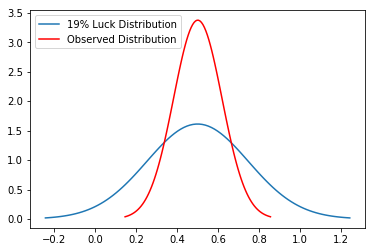

20% luck SD 0.244905827623


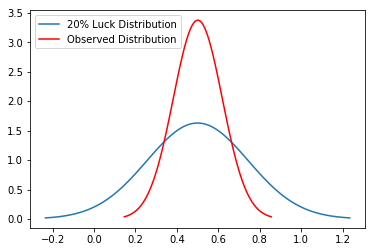

21% luck SD 0.241712806354


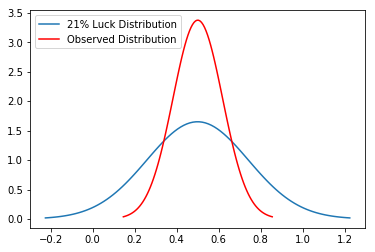

22% luck SD 0.239447790918


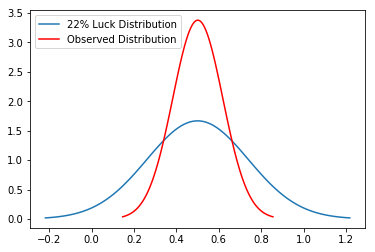

23% luck SD 0.236789404406


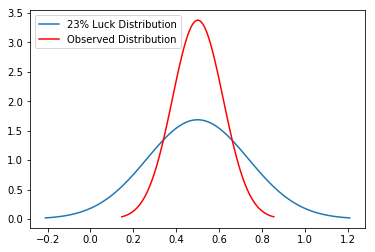

24% luck SD 0.23374676074


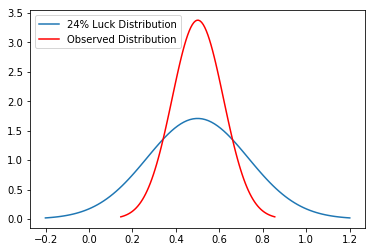

25% luck SD 0.231310309951


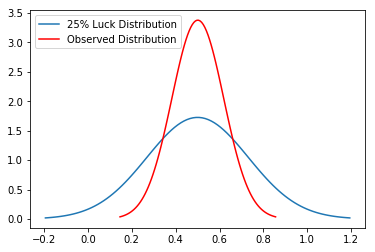

26% luck SD 0.229040727408


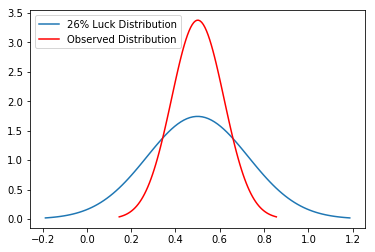

27% luck SD 0.226394522961


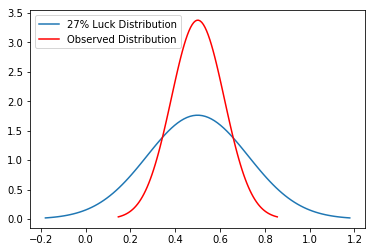

28% luck SD 0.223937050426


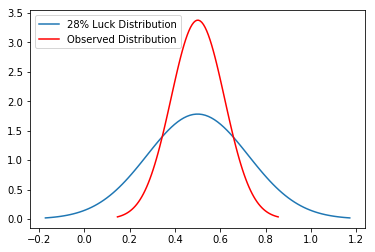

29% luck SD 0.220805580919


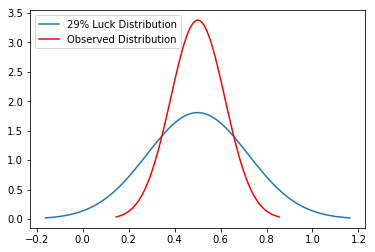

30% luck SD 0.217954835086


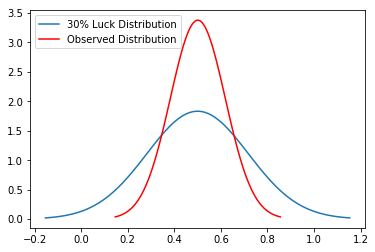

31% luck SD 0.215897691078


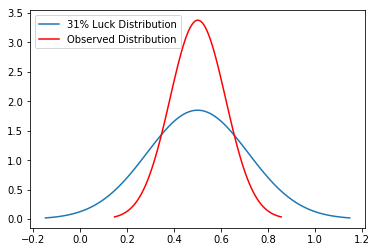

32% luck SD 0.212847038673


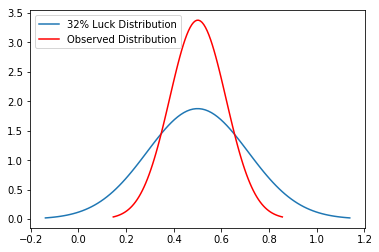

33% luck SD 0.210406049097


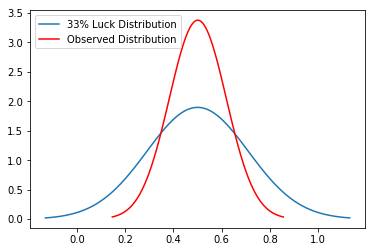

34% luck SD 0.208513788543


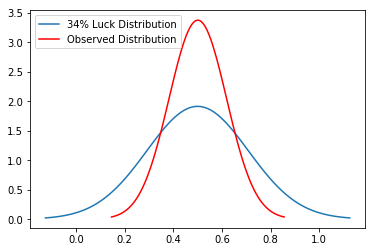

35% luck SD 0.205853484819


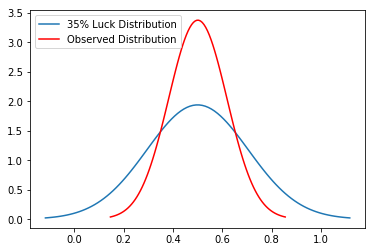

36% luck SD 0.202850792232


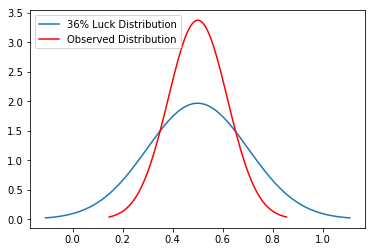

37% luck SD 0.200630638898


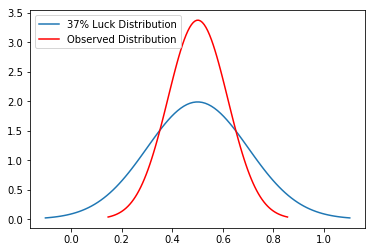

38% luck SD 0.197930528209


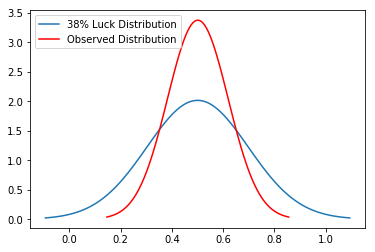

39% luck SD 0.196065234497


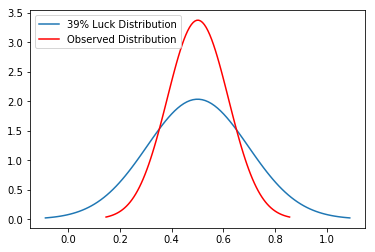

40% luck SD 0.192598065726


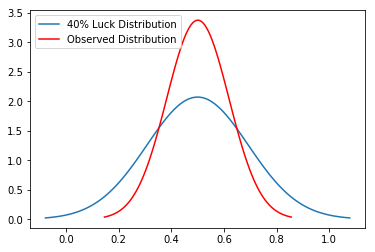

41% luck SD 0.191298541536


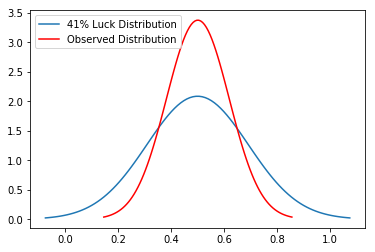

42% luck SD 0.188145500091


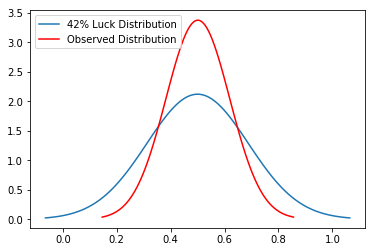

43% luck SD 0.185650008458


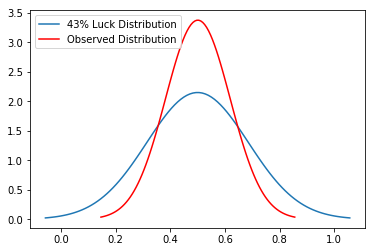

44% luck SD 0.182105669671


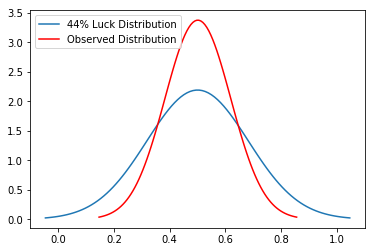

45% luck SD 0.179715651064


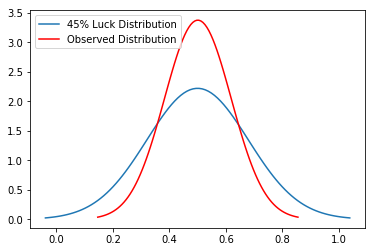

46% luck SD 0.178896993607


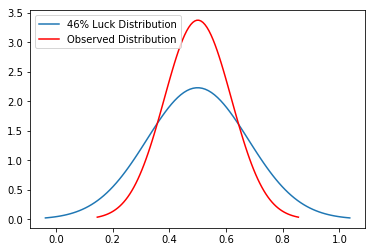

47% luck SD 0.174954466011


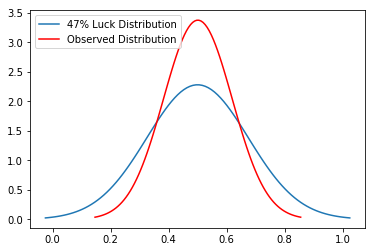

48% luck SD 0.172783678826


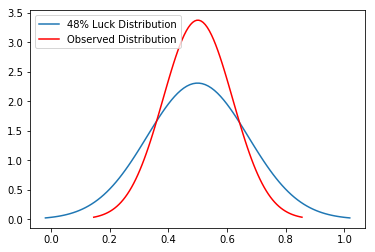

49% luck SD 0.170744911138


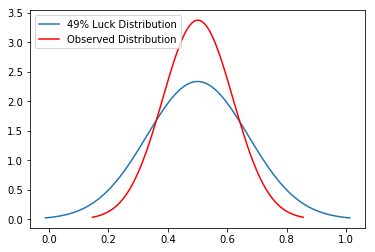

50% luck SD 0.168772639455


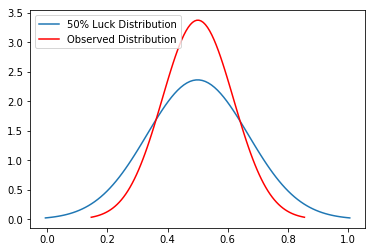

51% luck SD 0.166557973806


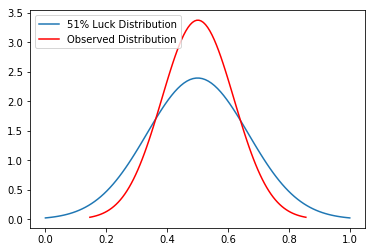

52% luck SD 0.163268249221


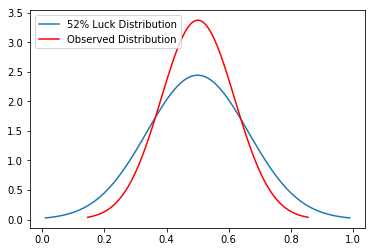

53% luck SD 0.16148064433


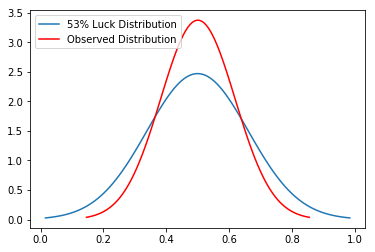

54% luck SD 0.158509282007


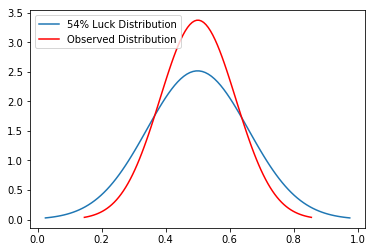

55% luck SD 0.157133330397


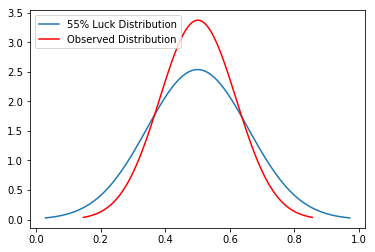

56% luck SD 0.154182760489


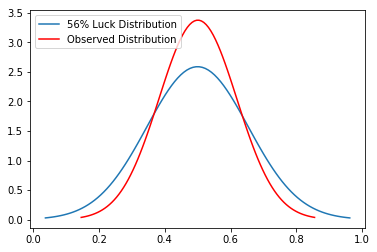

57% luck SD 0.151182765649


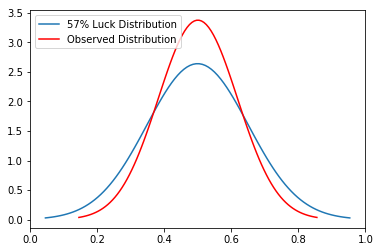

58% luck SD 0.149276142298


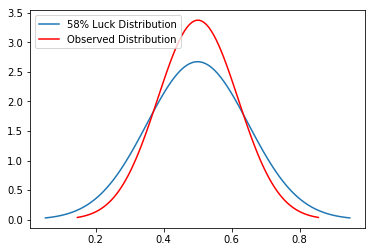

59% luck SD 0.14741481207


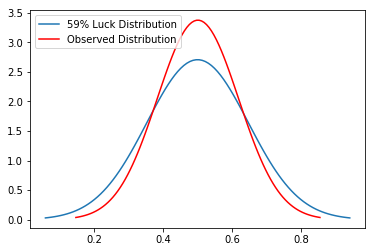

60% luck SD 0.145250174981


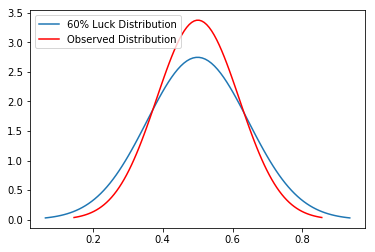

61% luck SD 0.14137785482


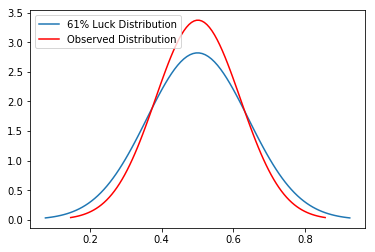

62% luck SD 0.14006006337


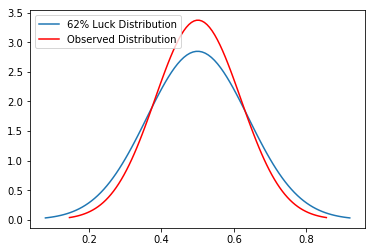

63% luck SD 0.138137473728


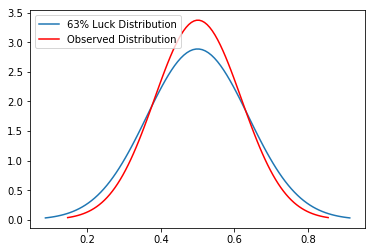

64% luck SD 0.136152180786


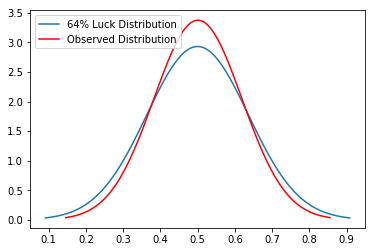

65% luck SD 0.134077257422


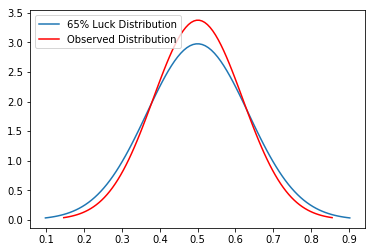

66% luck SD 0.131485531937


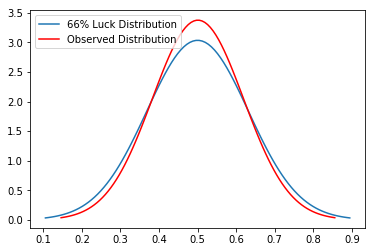

67% luck SD 0.129698245643


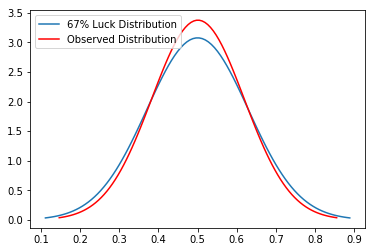

68% luck SD 0.128127249035


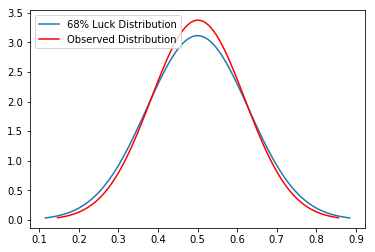

69% luck SD 0.12566334835


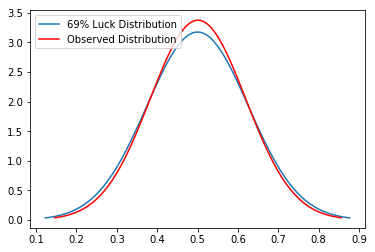

70% luck SD 0.124060857496


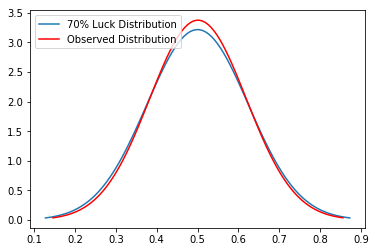

71% luck SD 0.121860529932


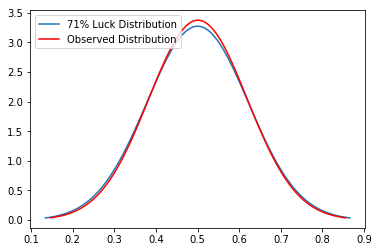

72% luck SD 0.12105002313


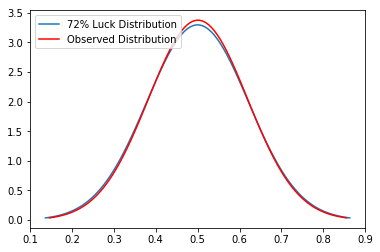

73% luck SD 0.118372868457


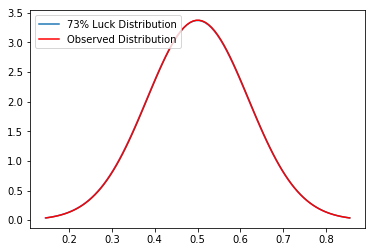

74% luck SD 0.116926143175


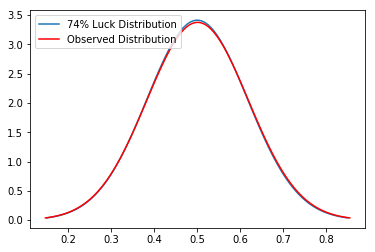

75% luck SD 0.114920760629


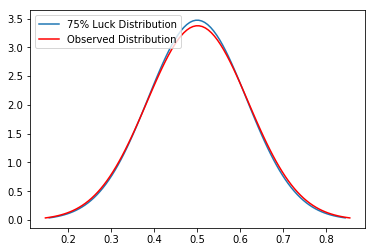

76% luck SD 0.113209844995


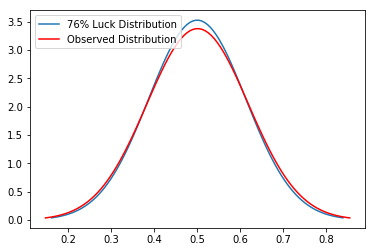

77% luck SD 0.11188766928


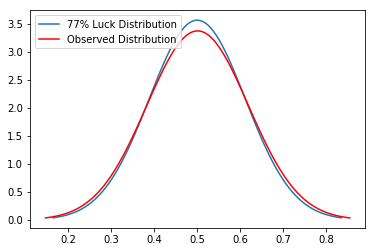

78% luck SD 0.110234926731


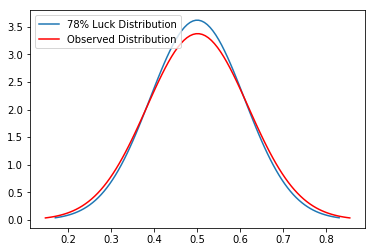

79% luck SD 0.107906040726


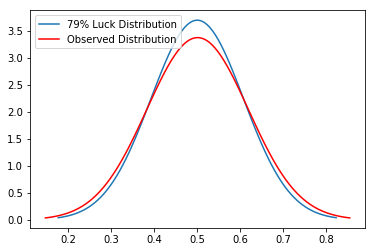

80% luck SD 0.106808961955


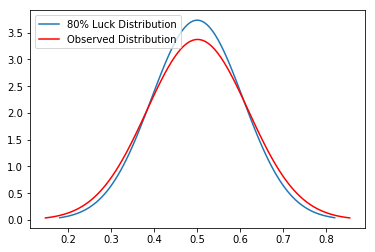

81% luck SD 0.105342051907


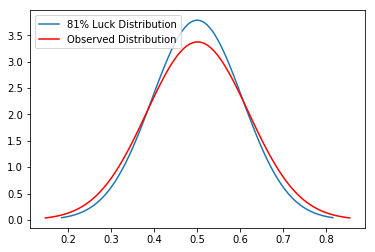

82% luck SD 0.103715290934


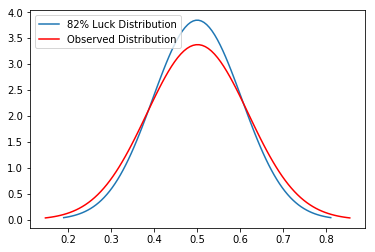

83% luck SD 0.102611254687


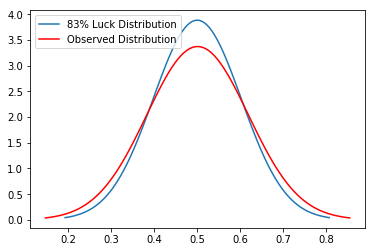

84% luck SD 0.100615385256


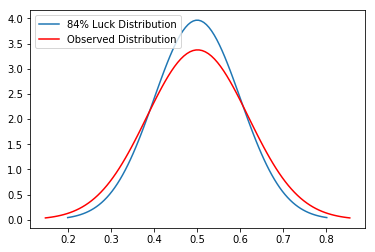

85% luck SD 0.100412039243


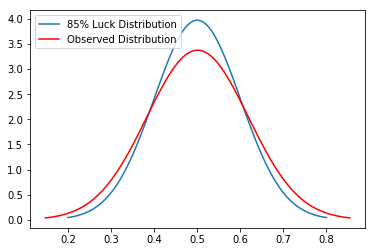

86% luck SD 0.0985032312043


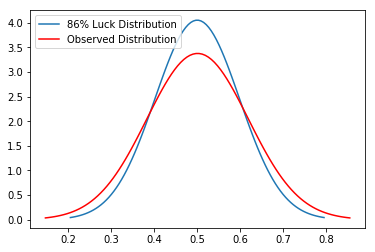

87% luck SD 0.0982098503259


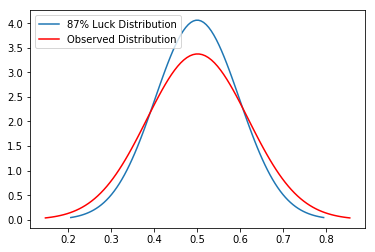

88% luck SD 0.0962946567442


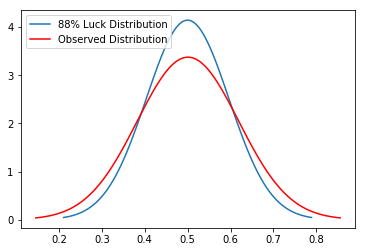

89% luck SD 0.09588027011


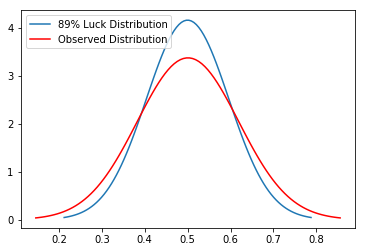

90% luck SD 0.0952646229911


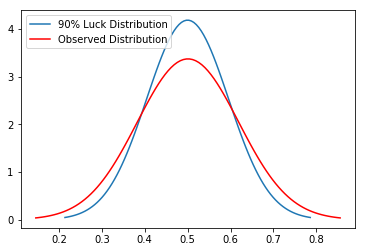

91% luck SD 0.0938008635584


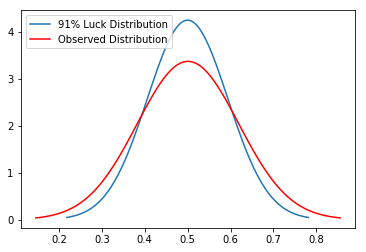

92% luck SD 0.0936923464634


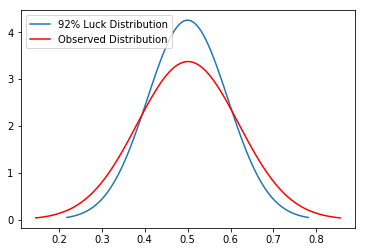

93% luck SD 0.0922256910443


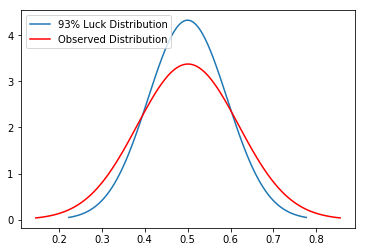

94% luck SD 0.0920487049684


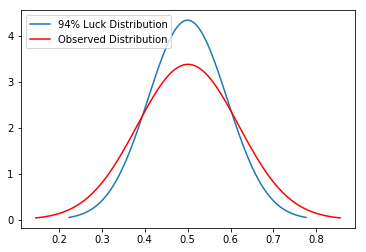

95% luck SD 0.0921768994893


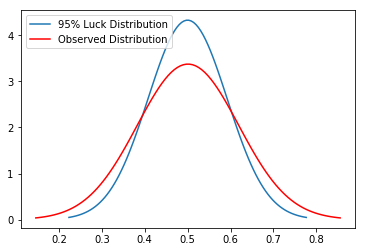

96% luck SD 0.0913735684535


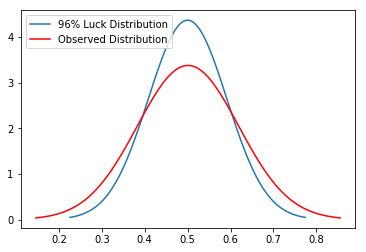

97% luck SD 0.090475974112


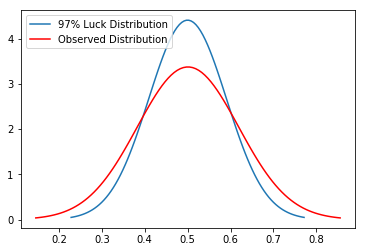

98% luck SD 0.090724786466


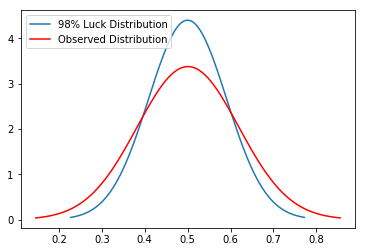

99% luck SD 0.0906898022354


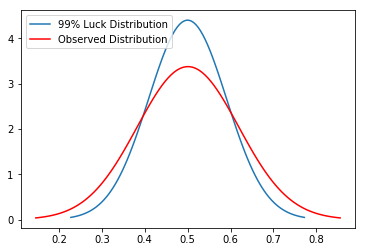

100% luck SD 0.0902469078631


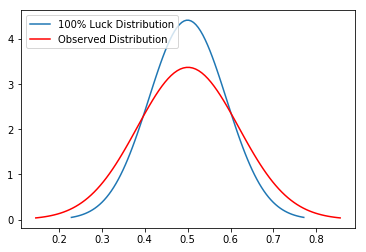

In [6]:
# l is amount attributed to luck
# see best amount of luck that accounts for actual season

ls = list(range(101))
stds = []

for l in range(101):
    
    K = 1000
    std = 0
    for _ in range(K):
        wins = np.zeros(actual_season.shape[0])
        totals = np.zeros(actual_season.shape[0])
        for i in range(actual_season.shape[0]):
            for j in range(i+1, actual_season.shape[0]):
                if random.random() < 0.01*l:
                    if random.random() < 0.5:
                        wins[i] += 1
                    else:
                        wins[j] += 1
                else:
                    wins[i] += 1
                totals[i] += 1
                totals[j] += 1
        pcts = wins/totals
        std += np.std(pcts)
    stds.append(std*1./K)
    print(str(l) + "% luck SD", std*1./K)
    create_plot_compare(0.5, std*1./K, actual_season, str(l) + '% Luck Distribution')

### Part 6: Find intersection

We'll plot the simulated standard deviation against the amount of luck to see what percentage of luck matches the observed standard deviation. We see this happens at around 73% luck.

Intersection at 73 percent luck


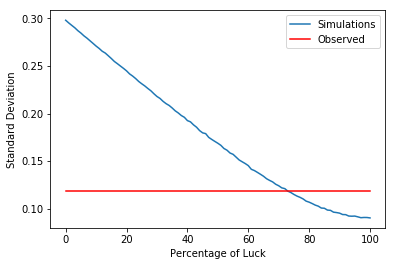

In [7]:
plt.plot(ls, stds, label='Simulations')
obs = [np.std(actual_season)  for _ in range(len(ls))]
plt.plot(ls, obs, label='Observed', c='r')
plt.xlabel("Percentage of Luck")
plt.ylabel("Standard Deviation")
plt.legend(loc='upper right')

idx = np.argwhere(np.diff(np.sign(np.asarray(stds) - np.asarray(obs))) != 0).reshape(-1) + 0
print("Intersection at", idx[0], "percent luck")
# plt.axvline(x=idx, c='black', linestyle=':')
plt.show()

### Part 7: Calculate Theoretical Limit

We see that the theoretical limit is 63.5%, confirming the literature studies that it is around 60%. 

In [8]:
luck = 73
skill = 100 - luck

limit = 0.5*luck + skill
print("Theoretical Limit", limit)

Theoretical Limit 63.5
